<a href="https://colab.research.google.com/github/fyemane/TensorFlow-ZTM-/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating sample regression data (so we can model it)


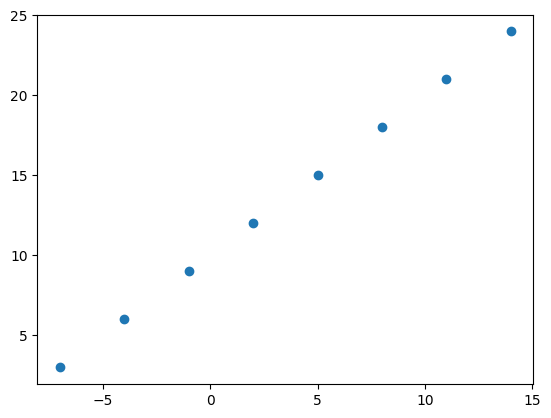

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([959700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([959700], dtype=int32)>)

In [ ]:
(X[0], y[0]), (X[1], y[1])

((-7.0, 3.0), (-4.0, 6.0))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

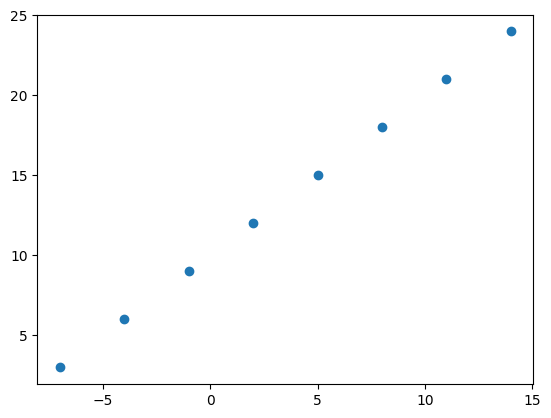

In [ ]:
plt.scatter(X, y);

## The major steps in modelling with TensorFlow

1. Get data ready (turn into tensors)
2. Build or pick a pretrained model (to suit your problem)
  * Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
  * Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is), the optimizer (tells our model how to improve the patterns its learning), and evaluation metrics (what we can use to interpret the performance of our model)
3. Fit the model to the data and make a prediction
  * Fitting a model - letting the model try to find patterns between X & y (features and labels).
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model



In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              # https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanAbsoluteError
              optimizer=tf.keras.optimizers.SGD(), # SGU is short for stochastic gradient descent
              # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # epochs = # of times model traines on data

Epoch 1/5
1/1 [==============================] - 0s 466ms/step - loss: 13.6126 - mae: 13.6126
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 13.4801 - mae: 13.4801
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 13.3476 - mae: 13.3476
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 13.2151 - mae: 13.2151
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 13.0826 - mae: 13.0826


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict(([17.0]))
y_pred

1/1 [==============================] - 0s 98ms/step


array([[2.4780219]], dtype=float32)

In [ ]:
y_pred + 11

array([[13.478022]], dtype=float32)

## Steps in improving a model with TensorFlow

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation functions of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

Learning rate: When Adam optimizer tells function to improve, how much should it improve at each step.

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 345ms/step - loss: 19.7146 - mae: 19.7146
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 19.4333 - mae: 19.4333
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 19.1521 - mae: 19.1521
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 18.8708 - mae: 18.8708
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 18.5896 - mae: 18.5896
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 18.3083 - mae: 18.3083
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 18.0271 - mae: 18.0271
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 17.7458 - mae: 17.7458
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 17.4646 - mae: 17.4646
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 17.1833 - mae: 17.1833
Epoch 11/100
1/1 [==============================] - 0

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 83ms/step


array([[29.515587]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 848ms/step - loss: 13.0727 - mae: 13.0727
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 12.3797 - mae: 12.3797
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 11.6758 - mae: 11.6758
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9595 - mae: 10.9595
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2301 - mae: 10.2301
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 9.4861 - mae: 9.4861
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7257 - mae: 8.7257
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9467 - mae: 7.9467
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1472 - mae: 7.1472
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.7799 - mae: 6.7799
Epoch 11/100
1/1 [==============================] - 0s 9ms/s

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 69ms/step


array([[26.573]], dtype=float32)

## Evaluating a TensorFlow model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

### Part 1: "Visualize, visualize, visualize"

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"

It's a good idea to visualize:
*
* The data - What data awre we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - How does it perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

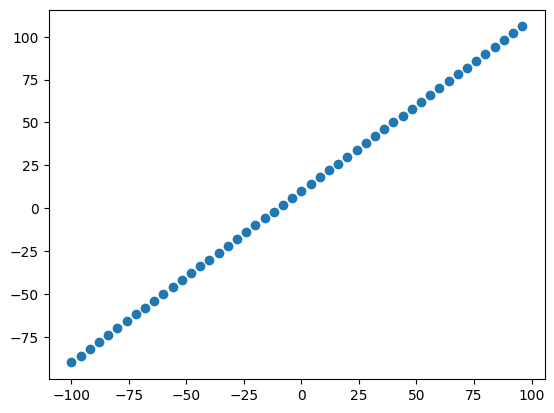

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y);

### Part 2: The 3 datasets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - The model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - The model gets evaluated on this data to test what it has learned. This set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

#### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

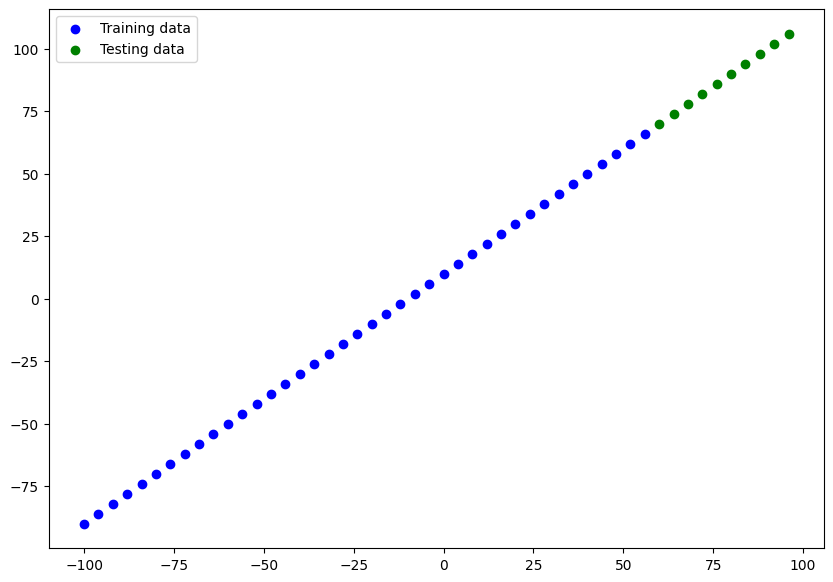

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

### Part 3: Getting a model summary

In [ ]:
# Let's have a look on how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

#### Visualizing the model


In [ ]:
# model.summary() # Wont' work if not built already with build() or fit()

In [ ]:
X[0], y[0] # they are scalars

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer.
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]), # define the input shape of the model
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learnt patterns or parameters from other models during **transfer learning**).

**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video. http://introtodeeplearning.com/

**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [ ]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

### Part 4: Visualizing a model's layers

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


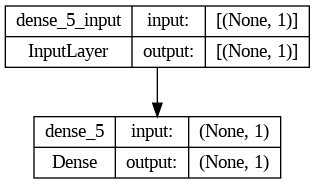

In [ ]:
from tensorflow.keras.utils import plot_model

# https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model
plot_model(model=model, show_shapes=True)

### Part 5: Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 46ms/step


array([[44.504948],
       [47.385445],
       [50.26594 ],
       [53.14644 ],
       [56.026936],
       [58.907433],
       [61.787926],
       [64.66842 ],
       [67.54892 ],
       [70.42941 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

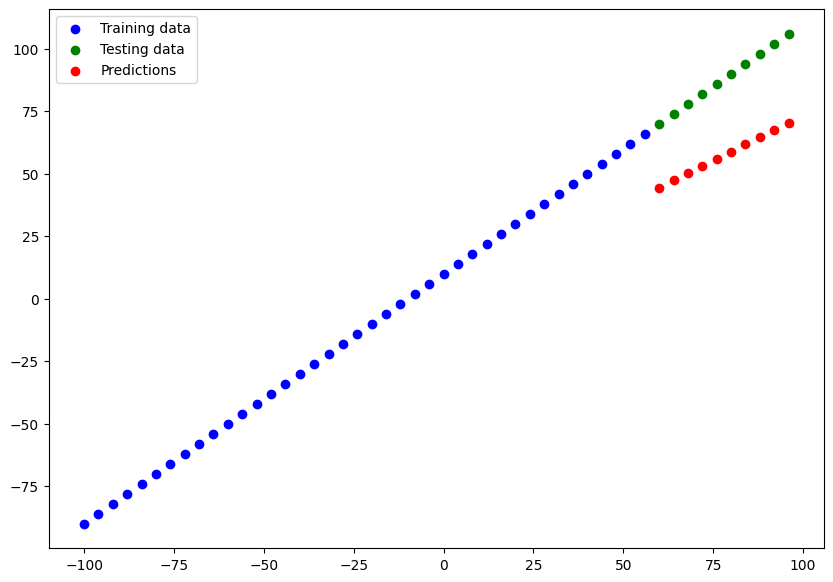

In [ ]:
plot_predictions(train_data=X_train,
                 test_data=X_test,
                 train_labels=y_train,
                 test_labels=y_test,
                 predictions=y_pred)

### Part 6: Common regression evaluation metrics

Depending on the problem you're working on, there will be differnet evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 151ms/step - loss: 30.5328 - mae: 30.5328


[30.532817840576172, 30.532817840576172]

### Part 7a: Mean absolute error

In [ ]:
# Calculate the mean absolute error
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanAbsoluteError
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.495052, 40.614555, 37.73406 , 34.85356 , 31.973064, 29.092566,
       26.212072, 23.331581, 20.45108 , 17.65647 ], dtype=float32)>

In [ ]:
tf.constant(y_pred), y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[44.504948],
        [47.385445],
        [50.26594 ],
        [53.14644 ],
        [56.026936],
        [58.907433],
        [61.787926],
        [64.66842 ],
        [67.54892 ],
        [70.42941 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([44.504948, 47.385445, 50.26594 , 53.14644 , 56.026936, 58.907433,
       61.787926, 64.66842 , 67.54892 , 70.42941 ], dtype=float32)>

In [ ]:
# Calculate the mean absolute error using reshaped y_pred
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.532818>

### Part 7b: Mean squared error

In [ ]:
# Calculate the mean squared error
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/MeanSquaredError
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=942.5926>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

## Setting up TensorFlow modelling experiments to improve our model


### Part 1: Start with a simple model
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your modelmore of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build** `model_1`

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 23ms/step - loss: 84.0947 - mae: 84.0947
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 48.6392 - mae: 48.6392
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 14.2219 - mae: 14.2219
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 7.6748 - mae: 7.6748
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1922 - mae: 9.1922
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 8.6568 - mae: 8.6568
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0821 - mae: 9.0821
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1112 - mae: 9.1112
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.9861 - mae: 19.9861
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8186 - mae: 10.8186
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

1/1 [==============================] - 0s 46ms/step


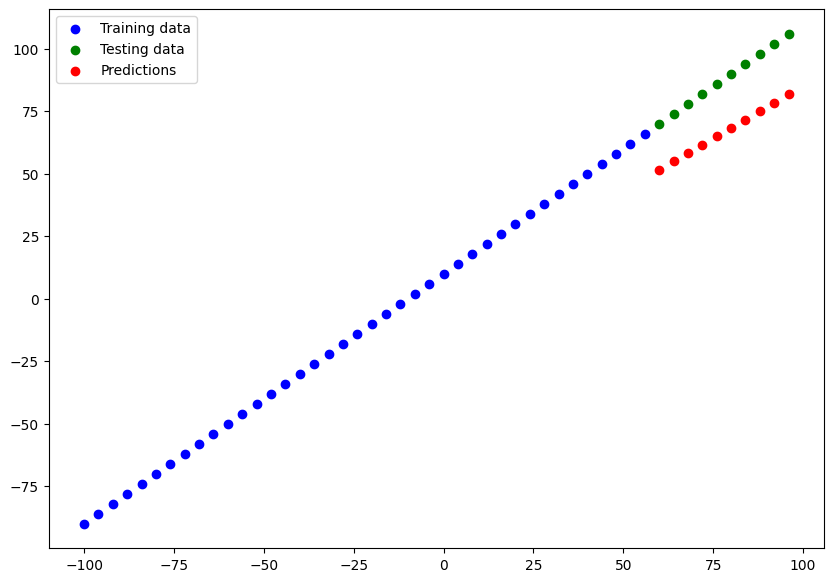

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[51.574207],
        [54.926945],
        [58.279682],
        [61.632423],
        [64.98516 ],
        [68.337906],
        [71.69064 ],
        [75.04338 ],
        [78.39612 ],
        [81.748856]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([51.574207, 54.926945, 58.279682, 61.632423, 64.98516 , 68.337906,
        71.69064 , 75.04338 , 78.39612 , 81.748856], dtype=float32)>)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.338467>,
 <tf.Tensor: shape=(), dtype=float32, numpy=458.78653>)

### Part 2: Increasing complexity

**Build `model_2`**

* 2 Dense (fully connected) layers, trained for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 45.3275 - mse: 2850.1848
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 33.5377 - mse: 1482.6449
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 37.1217 - mse: 2136.1372
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 23.2199 - mse: 773.1878
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 13.9323 - mse: 241.0312
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2488 - mse: 141.2601
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3248 - mse: 196.0737
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0181 - mse: 141.0269
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 39.1048 - mse: 2379.6899
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 26.6777 - mse: 1000.3781
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 71ms/step


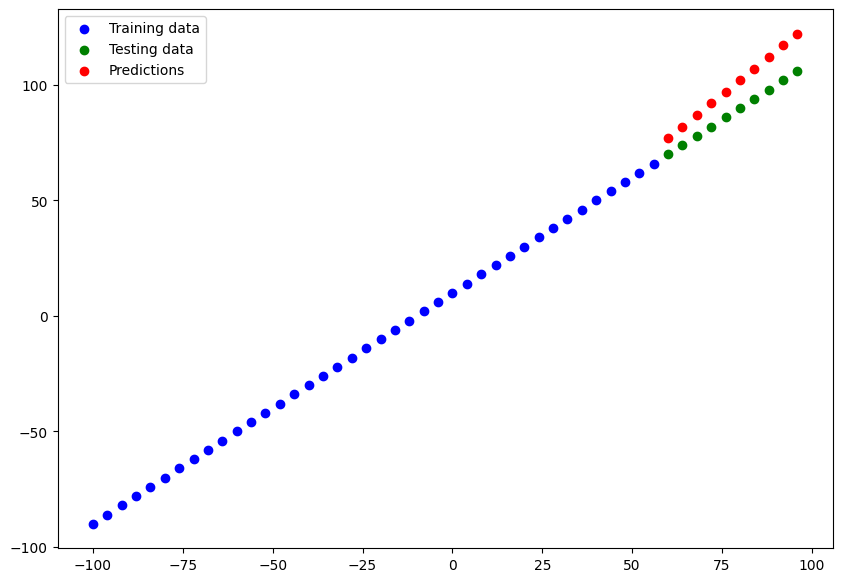

In [ ]:
# Make and plot predictions of model 2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=11.590208>,
 <tf.Tensor: shape=(), dtype=float32, numpy=142.92845>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 31.6149 - mae: 31.6149
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 26.8223 - mae: 26.8223
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 30.2441 - mae: 30.2441
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 16.0427 - mae: 16.0427
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 21.7484 - mae: 21.7484
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 11.8379 - mae: 11.8379
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 12.9687 - mae: 12.9687
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 41.2607 - mae: 41.2607
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 28.5541 - mae: 28.5541
Epoch 11/500
2/2 [==============================] - 0s 7m

1/1 [==============================] - 0s 71ms/step


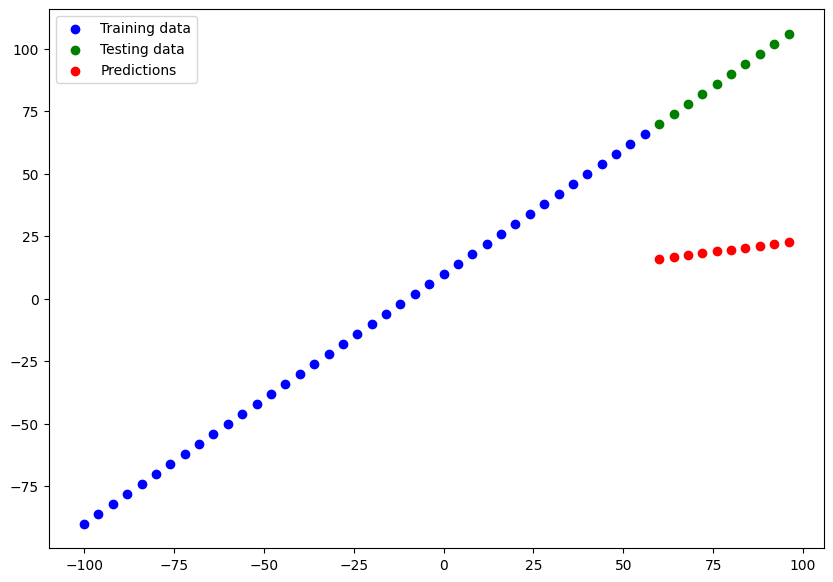

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.69386>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4805.2993>)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing and tracking your TensorFlow modelling experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.338467,458.786530
1,model_2,11.590208,142.928452
2,model_3,68.693863,4805.299316


Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, you will get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

### Tracking your experiments

One really good habit in machine larning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later). https://www.tensorflow.org/tensorboard
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard). https://wandb.ai/site

## How to save a TensorFlow model

Saving our models allows us to use them outside of Google Colab (or wherever they are trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

https://www.tensorflow.org/tutorials/keras/save_and_load

In [ ]:
# Save model using the SavedFormat format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## How to load and use a saved TensorFlow model

In [ ]:
# Load in the Saved model format
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 51ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a file using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds == model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 55ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## How to save and download files from Google Colab

If you want to download your files from Google Colab:
1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it to there.

In [ ]:
# Download a file from Google Colab
from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 "/content/drive/MyDrive/Udemy/TensorFlow"

cp: cannot create regular file '/content/drive/MyDrive/Udemy/TensorFlow': No such file or directory


In [ ]:
!ls "/content/drive/MyDrive/Udemy/TensorFlow"

ls: cannot access '/content/drive/MyDrive/Udemy/TensorFlow': No such file or directory


## Putting together what we've learned

### Part 1 (preparing a dataset)

https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Check the datatypes of the data in each columns
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# One hot encode categorical variables
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### Part 2 (building a regression model)

In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8557.7471 - mae: 8557.7471
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7884.2017 - mae: 7884.2017
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7530.7700 - mae: 7530.7700
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7695.0903 - mae: 7695.0903
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7739.4712 - mae: 7739.4712
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7659.2773 - mae: 7659.2773
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7530.8003 - mae: 7530.8003
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7721.5786 - mae: 7721.5786
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7555.8740 - mae: 7555.8740
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7675.9619 - mae: 7675.9619

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7668.9380 - mae: 7668.9380


[7668.93798828125, 7668.93798828125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try to improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. (Insert your own experiment here)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13296.4404 - mae: 13296.4404
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13131.1113 - mae: 13131.1113
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12779.2910 - mae: 12779.2910
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12083.0059 - mae: 12083.0059
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10924.8281 - mae: 10924.8281
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9472.2070 - mae: 9472.2070
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8168.9756 - mae: 8168.9756
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7551.2397 - mae: 7551.2397
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7450.7690 - mae: 7450.7690
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7430.3374 - mae:

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4882.7759 - mae: 4882.7759


[4882.77587890625, 4882.77587890625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7668.9380 - mae: 7668.9380


[7668.93798828125, 7668.93798828125]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13266.0449 - mae: 13266.0449
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13089.2373 - mae: 13089.2373
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12713.0156 - mae: 12713.0156
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11985.7598 - mae: 11985.7598
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10803.7900 - mae: 10803.7900
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9350.8750 - mae: 9350.8750
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8075.5215 - mae: 8075.5215
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7514.5332 - mae: 7514.5332
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7428.5518 - mae: 7428.5518
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.1787 - mae:

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3493.1016 - mae: 3493.1016


[3493.1015625, 3493.1015625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7668.9380 - mae: 7668.9380


[7668.93798828125, 7668.93798828125]

Text(0.5, 0, 'epochs')

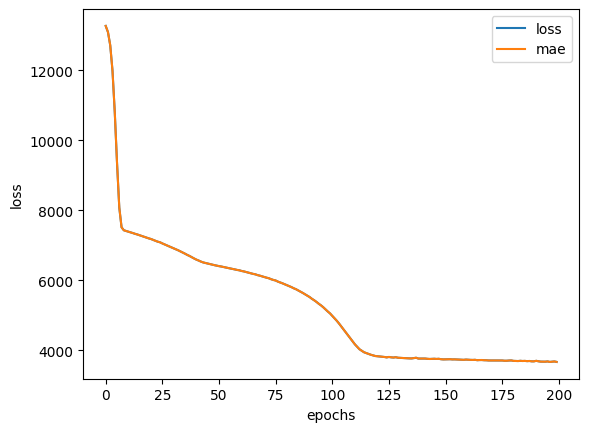

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

>**Question:** How long should you train for?

It depends. Really... it depends on teh problem you're working for. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.


## Preprocessing data with feature scaling (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to sue, you can try both and see which performs better.

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # ignore columns it doesn't know about
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [ ]:
# Normalized and one hot encoded data has added columns
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's biuld a neural network model on it and see how it goes...

In [ ]:
# Build a neural network model to fit on our noramlized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13344.1787 - mae: 13344.1787
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13336.7139 - mae: 13336.7139
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13317.5049 - mae: 13317.5049
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13276.4600 - mae: 13276.4600
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13202.4941 - mae: 13202.4941
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13084.5449 - mae: 13084.5449
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12912.2314 - mae: 12912.2314
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12675.3008 - mae: 12675.3008
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12363.4131 - mae: 12363.4131
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11970.76

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3439.4670 - mae: 3439.4670


[3439.467041015625, 3439.467041015625]

In [ ]:
# Insurance model 2 results
# 9/9 [==============================] - 0s 4ms/step - loss: 4732.4512 - mae: 4732.4512